<a href="https://colab.research.google.com/github/Harshpatel44/ML-A2/blob/master/A2-16%3A11-14-2-20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np


In [2]:
import matplotlib.pyplot as plt
def design1():
    #data 1
    mean1 = [-2,-2]
    cov1= [[3.5,0],[0,3.5]]
    x1, y1 = np.random.multivariate_normal(mean1, cov1, 200).T

    #data 2
    mean2 = [2,2]
    cov2= [[3.5,0.0],[0.0,3.5]]
    x2, y2 = np.random.multivariate_normal(mean2, cov2, 200).T

    d1_data = np.array([x1,y1,np.zeros(x1.shape)+1])
    d1_data=np.append(d1_data,[x2,y2,np.zeros(x1.shape)],axis=1)
    d1_data=d1_data.T
    return d1_data
d1_data=design1()
print(d1_data.shape)

(400, 3)


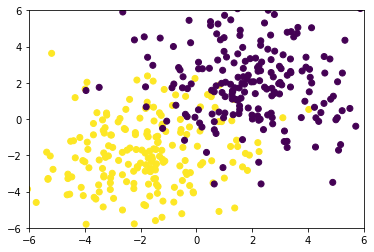

In [3]:
plt.scatter(d1_data[:,0],d1_data[:,1],c=d1_data[:,2])
plt.axis([-6,6,-6,6])
plt.show()

Taking covariance as [0.4,0][0,0.4] for noise 0
<br>
0.4 to 3.5 is the noise range

In [0]:
import matplotlib.pyplot as plt

for i in np.arange(0.5,4,0.1):
  #data 1
  mean1 = [-2,-2]
  cov1= [[i,0],[0,i]]
  x1, y1 = np.random.multivariate_normal(mean1, cov1, 20).T

  #data 2
  mean2 = [2,2]
  cov2= [[i,0.0],[0.0,i]]
  x2, y2 = np.random.multivariate_normal(mean2, cov2, 20).T

  plt.plot(x1, y1, 'ro',color='r')
  plt.plot(x2,y2,'ro',color='b')
  plt.axis([-6,6,-6,6])
  plt.show()
  print(str(i))

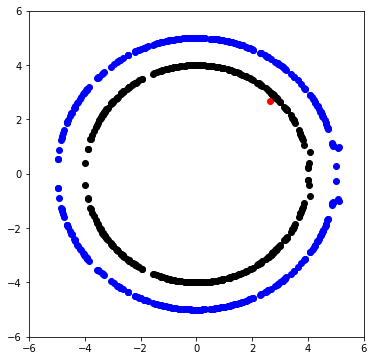

In [5]:
from matplotlib.pyplot import figure

def circle(radius,items):

    #creating random values for x
    #x=(2*radius+1)*np.random.uniform(items) - (radius+1)
    x = np.random.uniform(-radius,radius+0.1,items)
    #input()
    #applying circle equation to find y
    y=np.sqrt(np.abs(np.power(radius,2)-np.power(x,2) ))
    
    # print(x)
    # print(y)
    
    
    #appending x value again for correspondance with negative values of y. Hence appending negative values of y to y array.
    x=np.append(x,x)
    y=np.append(y,-y)

    # figure(figsize=(10,10))
    # plt.plot(x,y,'ro')    
    # plt.show()

    return x,y

x1,y1=circle(5,200)
x2,y2=circle(4,200)
#print(x1,x2)
plot_x= (np.maximum(x1,x2) - np.minimum(x1,x2)) * np.random.random_sample(400) - np.maximum(x1,x2)
plot_y= (np.maximum(y1,y2) - np.minimum(y1,y2)) * np.random.random_sample(400) - np.maximum(y1,y2)


plot_x = np.random.uniform(np.minimum(x1,x2),np.maximum(x1,x2),1)
plot_y = np.random.uniform(np.minimum(y1,y2),np.maximum(y1,y2),1)
#print(plot_x)

#mean1 = [(x1+x2)/2,(y1+y2)/2]
#cov1= [[i,0],[0,i]]
#x1, y1 = np.random.multivariate_normal(mean1, cov1, 20).T

  

#plotting

figure(figsize=(6,6))
plt.plot(plot_x,plot_y,'ro')
plt.plot(x1,y1,'ro',color='blue')
plt.plot(x2,y2,'ro',color='black')
plt.axis([-6,6,-6,6])
plt.show()



Creating dataset for part 2

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

def outer_circle(radius=5,items=130):
    a=np.random.random(items) * 2 * np.pi
    r = radius * np.sqrt(0.4*np.random.random(items)+0.6)
    x1 = r * np.cos(a)
    y1 = r * np.sin(a)
    return x1,y1

def inner_circle(radius=3,items=130):
    a=np.random.random(items) * 2 * np.pi
    r = radius * (np.sqrt(np.random.random(items)))
    x2 = r * np.cos(a) 
    y2 = r * np.sin(a)
    return x2,y2


x1,y1=outer_circle(5,500)
x2,y2=inner_circle(3,500)

d2_data=np.array([x1,y1,np.zeros(x1.shape)+1])
d2_data=(np.append(d2_data,[x2,y2,np.zeros(x2.shape)],axis=1)).T


Noise function for part 2

In [0]:
def noise(data,noise):
    amt=int( np.round( data.shape[0]*( noise/100 ) ) )
    arr=np.random.randint(0,data.shape[0]/2,amt)
    data[arr,2]=0
    arr=np.random.randint(data.shape[0]/2,data.shape[0],amt)
    data[arr,2]=1
    return data
d2_data=noise(d2_data,2)

Plotting graph for part 2

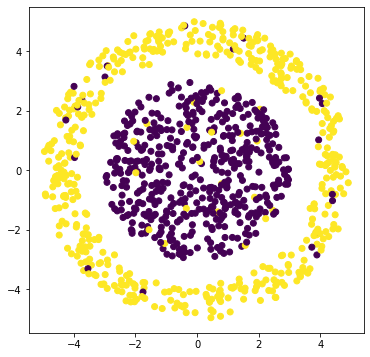

In [10]:
figure(figsize=(6,6))
plt.scatter(d2_data[:,0],d2_data[:,1],c=d2_data[:,2])
plt.show()

Creating one hot vector of d2_data

In [45]:
a1=np.where(d2_data[:,2]==0,1,0)
a1=np.resize(a1,(1000,1))
a2=np.where(d2_data[:,2]==1,1,0)
a2=np.resize(a2,(1000,1))
hot_vector=np.append(d2_data[:,:2],a1,axis=1)
hot_vector=np.append(hot_vector,a2,axis=1)
print(hot_vector.shape)
print(a1.shape)
print(a2.shape)

(1000, 4)
(1000, 1)
(1000, 1)


In [0]:
np.random.shuffle(hot_vector)

In [0]:
def active_func(method,z):  #checked
    if method=='relu':
      return np.maximum(0,z)
    if method =="leaky relu":
        return np.maximum(0.01*z,z)  #leaky relu
    if method=='sigmoid':
      return 1/(1+np.exp(-z))
    if method=="tanh":
      return 1
    if method=="softmax":
        # print(z)
        #input()
        return np.exp(z)/np.sum(np.exp(z),axis=0)

Activation function

In [121]:
b1=np.random.rand(2)
b2=np.random.rand(1)
def train(x,numInput,numHiddenUnits,numOutputs,activationType,numIter):
  
    def deriv_activ_fn(method,h):
      if method=='sigmoid':
        return (h * (1 - h))
      if method=="relu":
        return np.maximum(0,h)  
      if method =="leaky relu":
        return np.maximum(0.01*h,h)  #leaky relu
      if method=="tanh":
        return 1
      if method=="softmax":
        h1 = np.sum(np.exp(h),axis=0)-np.exp(h)
        h2 = np.exp(h)
        
        # return np.exp(h)* (np.sum(np.exp(h),axis=0)-np.exp(h))
        return np.multiply(h2,h1)
        #return active_func('softmax',h) * (1 - active_func('softmax',h))
      

    w1=np.random.rand(numInput,numHiddenUnits)
    w2=np.random.rand(numHiddenUnits,numOutputs) 
    for i in range(0,numIter):
        z1=np.dot(x[:,:-2],w1) 
        h1=active_func(activationType,z1) 
        z2=np.dot(h1,w2) 
        y=active_func('softmax',z2)
        # print(y.shape)
        t = (x[:,-2:]).reshape(x.shape[0],2)
        loss= t-y    
        #print(loss.shape)
        d=deriv_activ_fn('softmax',y)
        print(d,'----------------')
        print(d.shape)
        print(t.shape)
        print(y.shape)
        print((t-y).shape)
        print(h1.shape)
        y_ = np.multiply((t-y),d)
        print(y_.shape)
        w2_=np.dot(h1.T,y_)
        print(w2_.shape) 
        h_=np.dot(y_,w2.T)
        print(h_.shape)  
        z_=np.multiply(h_,deriv_activ_fn(activationType,h1))
        w1_ = np.dot(x[:,:-2].T,z_)
        w2 = w2 + w2_
        w1 = w1 + w1_
    return w1,w2,loss

#XOR input
X = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ])
t = np.array([[0,1,1,0]]).T
X = np.append(X,t,axis = 1)

w1,w2,loss=train(hot_vector,2,4,2,'relu',2)     #(x,numInput,numHiddenUnits,numOutputs,activationType,numIter)
print(w1,w2)

[[1000.09809757 1000.014313  ]
 [1000.75352953 1002.38314068]
 [1000.04668998 1000.00900352]
 ...
 [1000.09480969 1000.00914848]
 [1000.22909306 1000.01342303]
 [1000.04668998 1000.00900352]] ----------------
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 4)
(1000, 2)
(4, 2)
(1000, 4)
[[nan nan]
 [nan nan]
 [nan nan]
 ...
 [nan nan]
 [nan nan]
 [nan nan]] ----------------
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 4)
(1000, 2)
(4, 2)
(1000, 4)
[[nan nan nan nan]
 [nan nan nan nan]] [[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


<h3>Final copy try and tested</h3>

In [73]:
w1=w1
w2=w2
data=hot_vector
print(w1)
print(w2)
z1=np.dot(data[:,:-2],w1)
h1=active_func('leaky relu',z1) 
z2=np.dot(h1,w2) 
y=active_func('sigmoid',z2)
#t = (data).reshape(data.shape[0],1)
print(hot_vector[:,2:4][0:10,:])
print()
print(y[0:10,:])

#print(sum(y - t))

[[  755.90830673 -1125.20438762   321.16972125    33.8021851 ]
 [ 1381.74110061 -1805.14803947   144.39693401    10.62921912]]
[[ 25.33726793 -24.85763908]
 [-48.75108257 -23.76685414]
 [  4.81134842  -9.65053505]
 [ -1.63116859 -28.58086478]]
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]

[[1. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [1. 0.]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


PREDICT ABOVE

In [0]:
def deriv_activ_fn(method,h):
    if method=='sigmoid':
      return (h * (1 - h))
    if method=="relu":
      data=np.where(h<0,0,h)
      data=np.where(data==0,0.5,data)
      data=np.where(data>0,1,data)
      #print(data)
      return data
    if method=="tanh":
      return 1
X = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ])
t = np.array([[0,1,1,0]]).T
W1 = 2*np.random.random((3,4)) - 1
W2 = 2*np.random.random((4,1)) - 1
#print(W1.shape)
#print(W2.shape)
for j in range(1000):
  h = active_func('sigmoid',np.dot(X,W1))
  y = active_func('sigmoid',np.dot(h,W2))
  #print(y-t)
  #print((y-t).shape)
  y_delta = (t - y)*deriv_activ_fn('sigmoid',y)
  h_delta = np.dot(y_delta, W2.T) * deriv_activ_fn('sigmoid',h)
  #print(h_delta.shape)
  #print(X.T.shape)
  W2 += np.dot(h.T, y_delta)
  W1 += np.dot(X.T, h_delta)
print(W1,W2)

[[-1.56031433  2.59574336  3.38558895 -5.66913514]
 [-1.49048692  2.49032496  3.40995567 -5.61783856]
 [ 2.29909164  0.36362698 -5.18529841  2.14429775]] [[ 3.06872587]
 [ 2.12429067]
 [-7.03831147]
 [-7.79784702]]


11 lines of code above

In [0]:
w1=W1
w2=W2
data=X
print(w1.shape)
print(w2.shape)
z1=np.dot(data,w1)
h1=active_func('sigmoid',z1) 
z2=np.dot(h1,w2) 
y=active_func('sigmoid',z2)
#t = (data).reshape(data.shape[0],1)
print(t[0:10,:])
print(y[0:10,:])

#print(sum(y - t))


[0 0 0 4 5]


In [0]:
a=np.array([3,4,1])
print(active_func('softmax',a))

[0.25949646 0.70538451 0.03511903]
